In [9]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time

TensorFlow Version:  2.1.0


Total Events: 100000
Total Labels: 100000

Shape:  (100000, 1600)

Train:  (69700, 1600) (69700,)
Val:  (15300, 1600) (15300,)
Test:  (15000, 1600) (15000,)
 


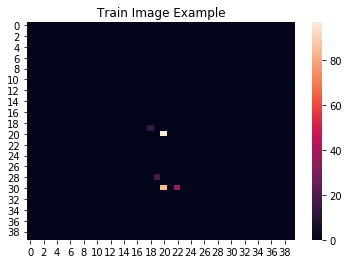

In [10]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(50000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)




In [11]:
naive_bayes = MultinomialNB()

In [12]:
# Naive Bayes
alpha = [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20, 30, 40, 50, 80, 100, 150]
# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
# Scoring object using accuracy
scorer = make_scorer(accuracy_score)
clfs_param =[(naive_bayes, naive_bayes_parameters)]

In [13]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised accuracy (validation): {}'.format(unopt_accuracy))
print('Best unoptimised accuracy (validation): {}\n'.format(max(unopt_accuracy)))
print('All optimised accuracy (validation): {}'.format(accuracies))
print('Best optimised accuracy (validation): {}'.format(max(accuracies)))


MultinomialNB

Time to tune: 29s
Time to fit-predict: 1s

Unoptimised: {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

Optimised: {'alpha': 20, 'class_prior': None, 'fit_prior': True}


Unoptimised-accuracy-training: 0.7152
Optimised-accuracy-training: 0.7152

Unoptimised-accuracy-validation: 0.7136
Optimised-accuracy-validation: 0.7135


All unoptimised accuracy (validation): [0.71359477124183]
Best unoptimised accuracy (validation): 0.71359477124183

All optimised accuracy (validation): [0.7134640522875817]
Best optimised accuracy (validation): 0.7134640522875817


In [14]:
models

[MultinomialNB(alpha=20, class_prior=None, fit_prior=True)]

[MultinomialNB(alpha=20, class_prior=None, fit_prior=True)]


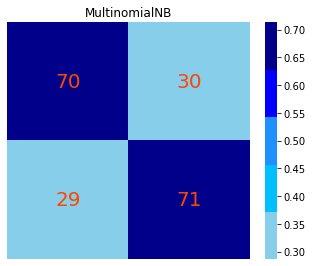

[array([[0.70379815, 0.29620185],
       [0.28719036, 0.71280964]])]


In [18]:
print(models)
cmx_sklearn(models, test_examples, test_labels, dim=4)